In [2]:
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import time
import networkx as nx
import numpy as np

In [3]:
import sage.all
from sage.graphs.graph import Graph

In [4]:
import sys
import os

In [5]:
script_dir = os.path.abspath('./algorithms/')
sys.path.append(script_dir)

In [6]:
import brute_force as bf
import genetic_algorithms as ga
import s_metaheuristics as sm
import interval_graph_check as igc

### Brute force - plot

In [7]:
test_graphs = {
    "g1": [(0, 1), (1, 2), (2, 3), (3, 0)],
    "g2": [(0, 1), (1, 2), (2, 3), (3, 4)],
    "g3": [(0, 1), (1, 2), (2, 3), (3, 4), (0, 2)],
    "g4": [(1, 2), (2, 3), (2, 5), (2, 6), (3, 4), (5, 6)],
    "i1": [(0, 1), (1, 2), (2, 3)],
    "i2": [(0, 1), (0, 2), (0, 3), (0, 4)],
    "i3": [(0, 1), (1, 2), (2, 0)],
    "i4": [(0, 1), (1, 2), (2, 3)],
    "i5": [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)],
    "i6": [(0, 1), (0, 3), (0, 6), (1, 2), (1, 3), (1, 4), (1, 6), (2, 4), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6), (6, 7)],
    #"gA": [(0, 1), (1, 2), (1, 5), (2, 3), (2, 6), (3, 4), (3, 7), (5, 6), (6, 7), (7, 8)],
    #"gB": [(0, 1), (0, 3), (0, 6), (1, 2), (1, 3), (1, 4), (1, 6), (2, 4), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (6, 7)]
}

In [8]:
gA =  [(0, 1), (1, 2), (1, 5), (2, 3), (2, 6), (3, 4), (3, 7), (5, 6), (6, 7), (7, 8)]
gB = [(0, 1), (0, 3), (0, 6), (1, 2), (1, 3), (1, 4), (1, 6), (2, 4), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (6, 7)]

In [9]:
def plot_bf(name, G):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    start_time = time.time()
    added_edges, G_min = bf.brute_force_min_interval_completion(G)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Graf: {name}")
    if added_edges is None:
        print("Initial graph is already an interval graph")
    else:
        print(f"Added edges: {added_edges}")
    print(f"Execution time: {elapsed_time:.4f} s")
    print("\n")

    # Plotting initial graph
    plot_G = G.plot(figsize=(8, 8), vertex_size=500, edge_color='blue', graph_border=False)

    # Plotting modified graph
    if added_edges is None:
        plot_G_min = G.plot(figsize=(8, 8), vertex_size=500, edge_color='blue', graph_border=False)
    else:
        plot_G_min = G_min.plot(figsize=(8, 8), vertex_size=500, edge_color='red', graph_border=False)

    # Adding graphs to subplots
    plot_G.matplotlib(figure=fig, sub=ax[0])
    ax[0].set_title(f"Initial Graph: {name}")
    ax[0].axis('off')

    plot_G_min.matplotlib(figure=fig, sub=ax[1])
    ax[1].set_title(f"Modified Graph: {name}")
    ax[1].axis('off')

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

Graf: g1
Added edges: ((0, 2),)
Execution time: 0.0072 s




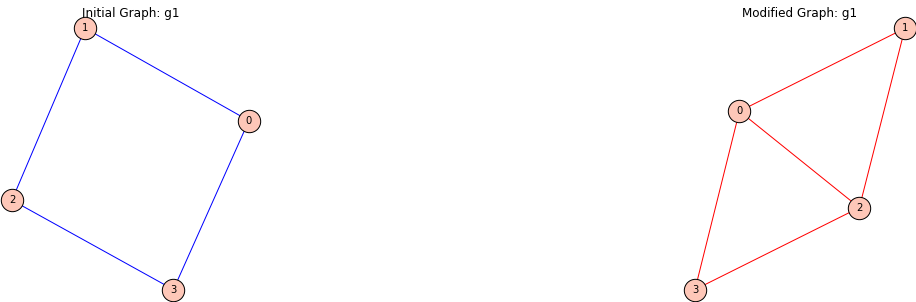

Graf: g2
Added edges: ((1, 3),)
Execution time: 0.1158 s




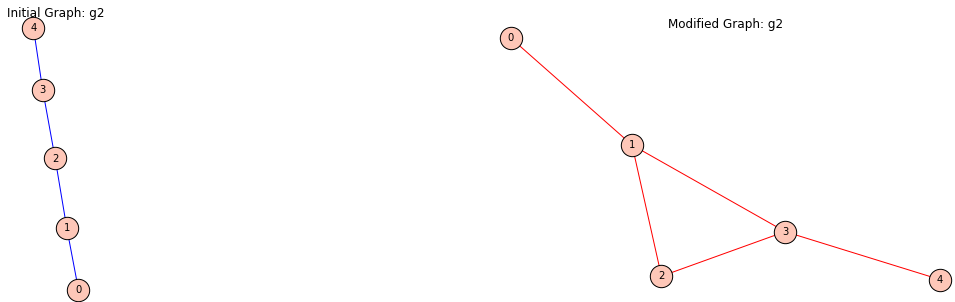

Graf: g3
Added edges: ((0, 3),)
Execution time: 0.1136 s




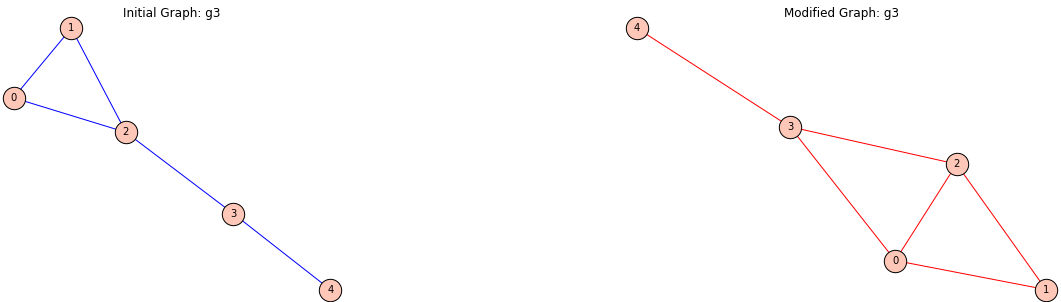

Graf: g4
Added edges: ((3, 6),)
Execution time: 3.7474 s




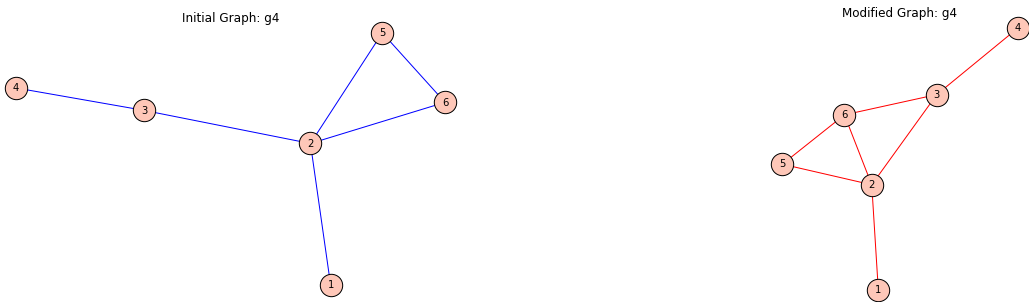

Graf: i1
Initial graph is already an interval graph
Execution time: 0.0003 s




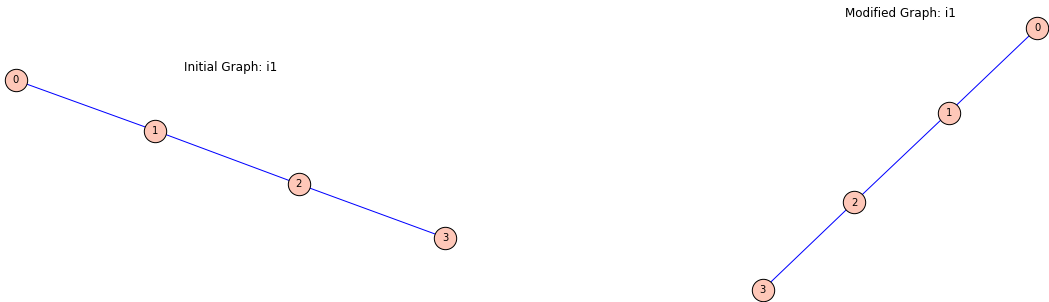

Graf: i2
Initial graph is already an interval graph
Execution time: 0.0003 s




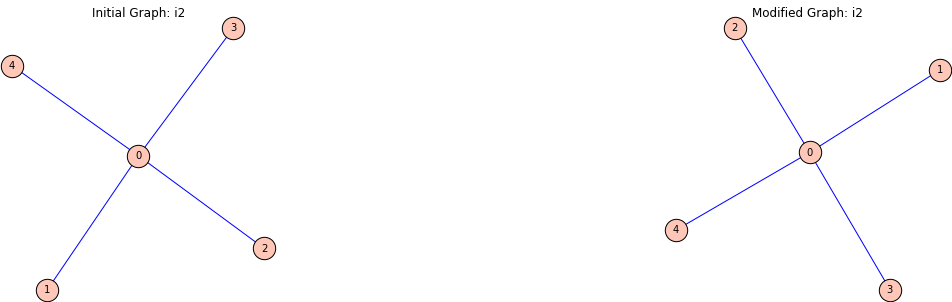

Graf: i3
Initial graph is already an interval graph
Execution time: 0.0002 s




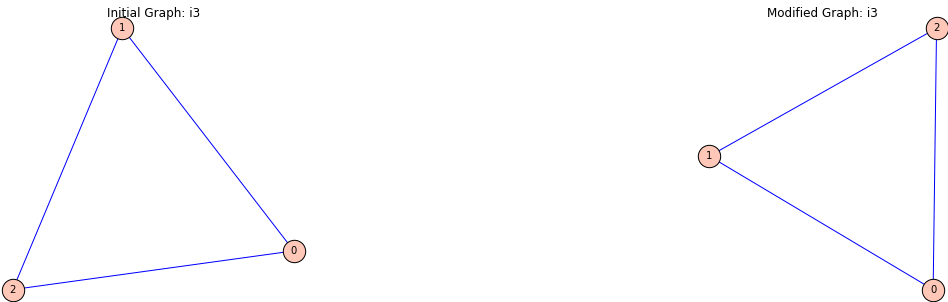

Graf: i4
Initial graph is already an interval graph
Execution time: 0.0002 s




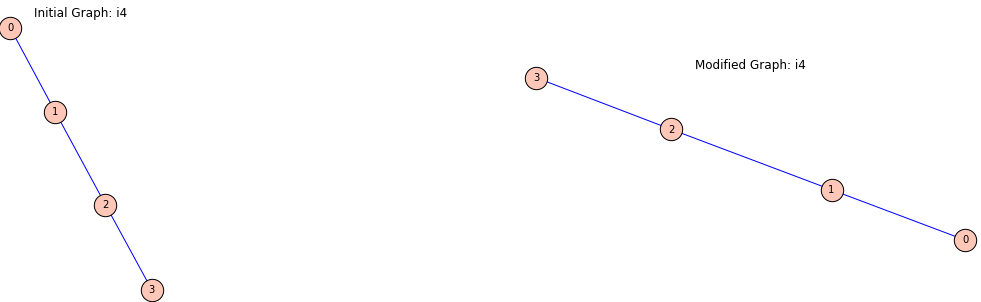

Graf: i5
Initial graph is already an interval graph
Execution time: 0.0003 s




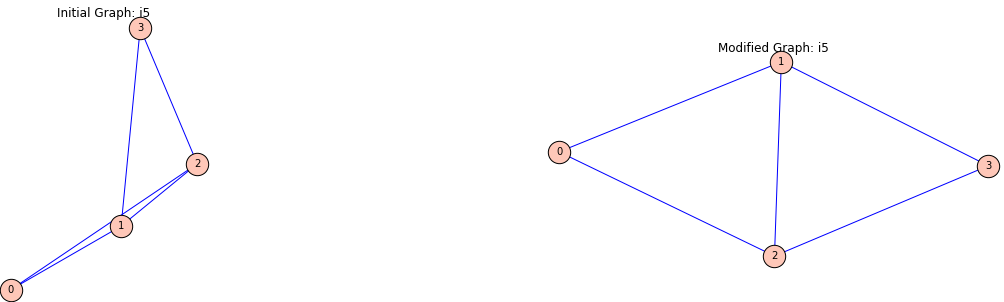

Graf: i6
Initial graph is already an interval graph
Execution time: 0.0003 s




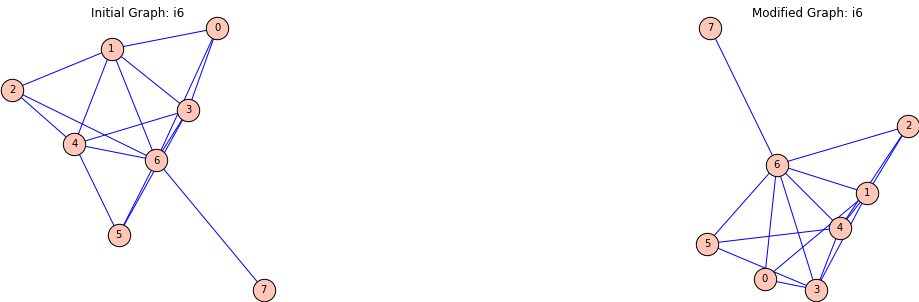

In [10]:
for name, G in test_graphs.items():
    plot_bf(name, Graph(G))

### Simulated annealing - plot

In [25]:
def plot_sa(G):

    print("Simulated annealing")
    print("\n")
    
    start_time = time.time()

    added_edges, G_min, values = sm.simulated_annealing(G, num_iters=20000)

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"Initial graph: {G.edges(labels=False)}")
    if added_edges is None:
        print("Initial graph is already an interval graph")
        print('\n')
    else:
        print(f"Added edges: {added_edges}")
    print(f"Execution time: {elapsed_time:.4f} s")
    print("\n")

    # Plotting initial graph
    plot_G = G.plot(figsize=(8, 8), vertex_size=500, edge_color='blue', graph_border=False)

    # Plotting modified graph
    if added_edges is None:
        plot_G_min = G.plot(figsize=(8, 8), vertex_size=500, edge_color='blue', graph_border=False)
    else:
        plot_G_min = G_min.plot(figsize=(8, 8), vertex_size=500, edge_color='red', graph_border=False)

    # Create figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))

    # Adding graphs to subplots
    plot_G.matplotlib(figure=fig, sub=axes[0])
    axes[0].set_title("Initial Graph")
    axes[0].axis('off')

    plot_G_min.matplotlib(figure=fig, sub=axes[1])
    axes[1].set_title("Modified Graph")
    axes[1].axis('off')

    # Plotting the solution values after the algorithm completes
    if values and any(val is not None for val in values):
        # Remove None values and plot
        clean_values = [val if val is not None else 0 for val in values]
        axes[2].plot(range(len(clean_values)), clean_values)
        axes[2].set_title('Simulated Annealing Progress')
        axes[2].set_xlabel('Steps')
        axes[2].set_ylabel('Solution Value')
        axes[2].set_ylim(bottom=0)  # Ensure y-axis starts from 0
    else:
        # Plot a horizontal line at y=0
        axes[2].axhline(y=0, color='black', linestyle='--')
        axes[2].set_title('Simulated Annealing Progress (No Added Edges)')
        axes[2].set_xlabel('Steps')
        axes[2].set_ylabel('Solution Value')
        axes[2].set_ylim(bottom=0)  # Ensure y-axis starts from 0

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

### Simulated annealing - cooling plot

In [12]:
cooling_params = {
    't_max_values' : [1000, 5000],
    't_min' : 1,
    'step_max' : 20000,
    'alpha' : 0.95
}

In [26]:
def plot_sa_cooling(G, cooling_params):
    
    print("Simulated annealing - cooling")
    print("\n")
    
    cooling_methods = {
        'linear_multiplicative': sm.linear_multiplicative_cooling,
        'natural_log_exponential_multiplicative': sm.natural_log_exponential_multiplicative_cooling,
        'logarithmic_multiplicative': sm.logarithmic_multiplicative_cooling,
        'quadratic_multiplicative': sm.quadratic_multiplicative_cooling,
        'linear_additive': sm.linear_additive_cooling,
        'exponential_additive': sm.exponential_additive_cooling,
        'quadratic_additive': sm.quadratic_additive_cooling
    }

    t_max_values = cooling_params['t_max_values']
    t_min = cooling_params['t_min']
    step_max = cooling_params['step_max']
    alpha = cooling_params['alpha']

    acceptance_rates = {t_max: [] for t_max in t_max_values}
    labels = list(cooling_methods.keys())
    colors = plt.cm.viridis(np.linspace(0, 1, len(t_max_values)))  # Use a colormap to get distinct colors

    check, _ = igc.check_interval_graph(G)
    if check:
        print('Graph is already interval graph')
        print('\n')
    else:
        # Prepare plots
        fig, axs = plt.subplots(len(cooling_methods), len(t_max_values), figsize=(15, 15), sharex=True)
        fig.suptitle('Simulated Annealing Performance for Different Cooling Methods and Temperatures')

        for i, (name, cooling_func) in enumerate(cooling_methods.items()):
            for j, t_max in enumerate(t_max_values):
                
                start_time = time.time()
                
                best_state, G_minimal, values, best_energy, acceptance_rate = sm.simulated_annealing_cooling(
                    G, cooling_func, t_max=t_max, t_min=t_min, step_max=step_max, alpha=alpha
                )

                end_time = time.time()
                elapsed_time = end_time - start_time
                
                # Replace 'inf' values with NaN for plotting
                values = [v if v != float('inf') else np.nan for v in values]

                # Store acceptance rate for the current t_max
                acceptance_rates[t_max].append(acceptance_rate)

                # Print the best number of added edges
                print(f"Cooling Method: {name}")
                print(f't_max={t_max}, Best Number of Added Edges: {best_energy}, Acceptance rate: {acceptance_rate}')
                print(f"Execution time: {elapsed_time:.4f} s")
                print("-------------------------------")

                # Plot number of added edges
                ax = axs[i, j]
                ax.scatter(range(len(values)), values, color=colors[j], label=f't_max={t_max}')  # Scatter plot to handle NaN values
                ax.set_title(f'{name}')
                ax.set_xlabel('Step')
                ax.set_ylabel('Number of Added Edges')
                ax.legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

        # Plotting the acceptance rates as grouped bar charts
        fig, ax = plt.subplots(figsize=(15, 8))  # Increased the size of the plot

        # Define width of bars and positions for each group
        bar_width = 0.05
        positions = np.arange(len(t_max_values))

        # Hatch patterns for inf values
        hatches = ['//', '\\\\', '||', '++', 'xx', 'oo', '--']

        tolerance = 1e-10  # Define a small tolerance

        # Plot each cooling method's acceptance rates
        for i, name in enumerate(labels):
            rates = [acceptance_rates[t_max][i] for t_max in t_max_values]
            colors = [f'C{i}' for _ in t_max_values]  # Assign colors to each bar based on cooling method index
            for j, rate in enumerate(rates):
                if abs(rate) < tolerance:
                    # If rate is effectively zero, plot with hatch pattern
                    ax.bar(positions[j] + i * bar_width, 1.0, bar_width, color=colors[j], hatch=hatches[i], label=name if j == 0 else "")
                else:
                    ax.bar(positions[j] + i * bar_width, rate, bar_width, color=colors[j], label=name if j == 0 else "")

        # Add a horizontal line at 0.8 acceptance rate
        ax.axhline(y=0.8, color='red', linestyle='--', label='0.8 Acceptance Rate')

        # Add labels and title
        ax.set_xlabel('t_max values')
        ax.set_ylabel('Acceptance Rate')
        ax.set_title('Acceptance Rates for Different Cooling Methods and t_max')
        ax.set_xticks(positions + bar_width * (len(labels) - 1) / 2)
        ax.set_xticklabels(t_max_values)
        ax.legend()

        plt.tight_layout()
        plt.show()

## VNS - plot 

In [18]:
vns_params = {
    'time_limit': [10, 20, 30],  # Maximum time in seconds
    'k_min': 1,        # Minimum k value for shaking
    'k_max': 5,        # Maximum k value for shaking
    'move_prob': 0.1   # Probability to accept a solution of the same value
}

In [15]:
def handle_infinity(values):
    return [v if np.isfinite(v) else np.nan for v in values]

In [27]:
def plot_vns(G, vns_params):
    
    print("VNS")
    print("\n")
    
    check, _ = igc.check_interval_graph(G)
    if check:
        print('Graph is already an interval graph')
        print('\n')
    else:
        
        # Set up the subplot grid with 2 plots per row (value and new_value)
        fig, axs = plt.subplots(len(vns_params['time_limit']), 2, figsize=(15, 5 * len(vns_params['time_limit'])))

        # Loop through each time limit and plot
        for idx, t_limit in enumerate(vns_params['time_limit']):
            vns_params_current = vns_params.copy()
            vns_params_current['time_limit'] = t_limit
                
            print(f"Time limit: {t_limit}")    
            
            # Run the VNS algorithm
            solution, G_minimal, value, all_values, all_new_values = sm.vns_min_interval_completion(G, vns_params_current)
            
            # Ensure iterations match the length of solution_values
            iterations = list(range(len(all_values)))
            print(f"Solution: {solution}, Value: {value}, Number of iterations: {len(all_values)}")
            G_minimal.show()
            print("-------------------------------------------------")

            # Handle infinite values for plotting
            all_values = handle_infinity(all_values)
            all_new_values = handle_infinity(all_new_values)

            # Plot value for each iteration
            axs[idx, 0].plot(iterations, all_values, label='Value', color='blue', marker='o')
            axs[idx, 0].set_xlabel('Iteration')
            axs[idx, 0].set_ylabel('Value')
            axs[idx, 0].set_title(f'Value over Iterations (time_limit={t_limit})')
            axs[idx, 0].legend()

            # Plot new_value for each iteration
            axs[idx, 1].plot(iterations, all_new_values, label='New Value', color='red', marker='x')
            axs[idx, 1].set_xlabel('Iteration')
            axs[idx, 1].set_ylabel('New Value')
            axs[idx, 1].set_title(f'New Value over Iterations (time_limit={t_limit})')
            axs[idx, 1].legend()

        # Adjust layout to ensure plots do not overlap
        plt.tight_layout()
        plt.show()

#### Testing s_metaheuristics on random graph

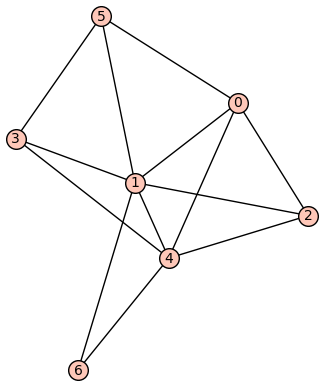

Simulated annealing


Initial graph: [(0, 1), (0, 2), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 4), (3, 4), (3, 5), (4, 6)]
Added edges: [(4, 5)]
Execution time: 4.9203 s




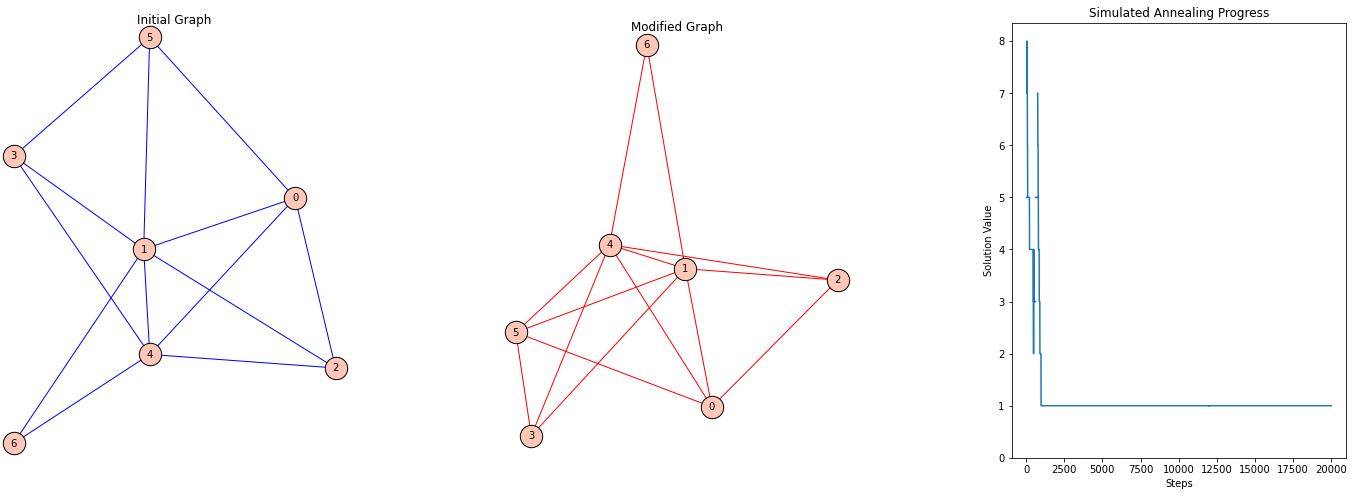

Simulated annealing - cooling


Cooling Method: linear_multiplicative
t_max=1000, Best Number of Added Edges: 1, Acceptance rate: 0.9895536562203229
Execution time: 0.3482 s
-------------------------------
Cooling Method: linear_multiplicative
t_max=5000, Best Number of Added Edges: 1, Acceptance rate: 0.9648556231003039
Execution time: 1.7232 s
-------------------------------
Cooling Method: natural_log_exponential_multiplicative
t_max=1000, Best Number of Added Edges: 1, Acceptance rate: 0.875
Execution time: 0.0432 s
-------------------------------
Cooling Method: natural_log_exponential_multiplicative
t_max=5000, Best Number of Added Edges: 1, Acceptance rate: 0.8988095238095238
Execution time: 0.0529 s
-------------------------------
Cooling Method: logarithmic_multiplicative
t_max=1000, Best Number of Added Edges: 1, Acceptance rate: 0.63035
Execution time: 6.8195 s
-------------------------------
Cooling Method: logarithmic_multiplicative
t_max=5000, Best Number of Added Edges: 

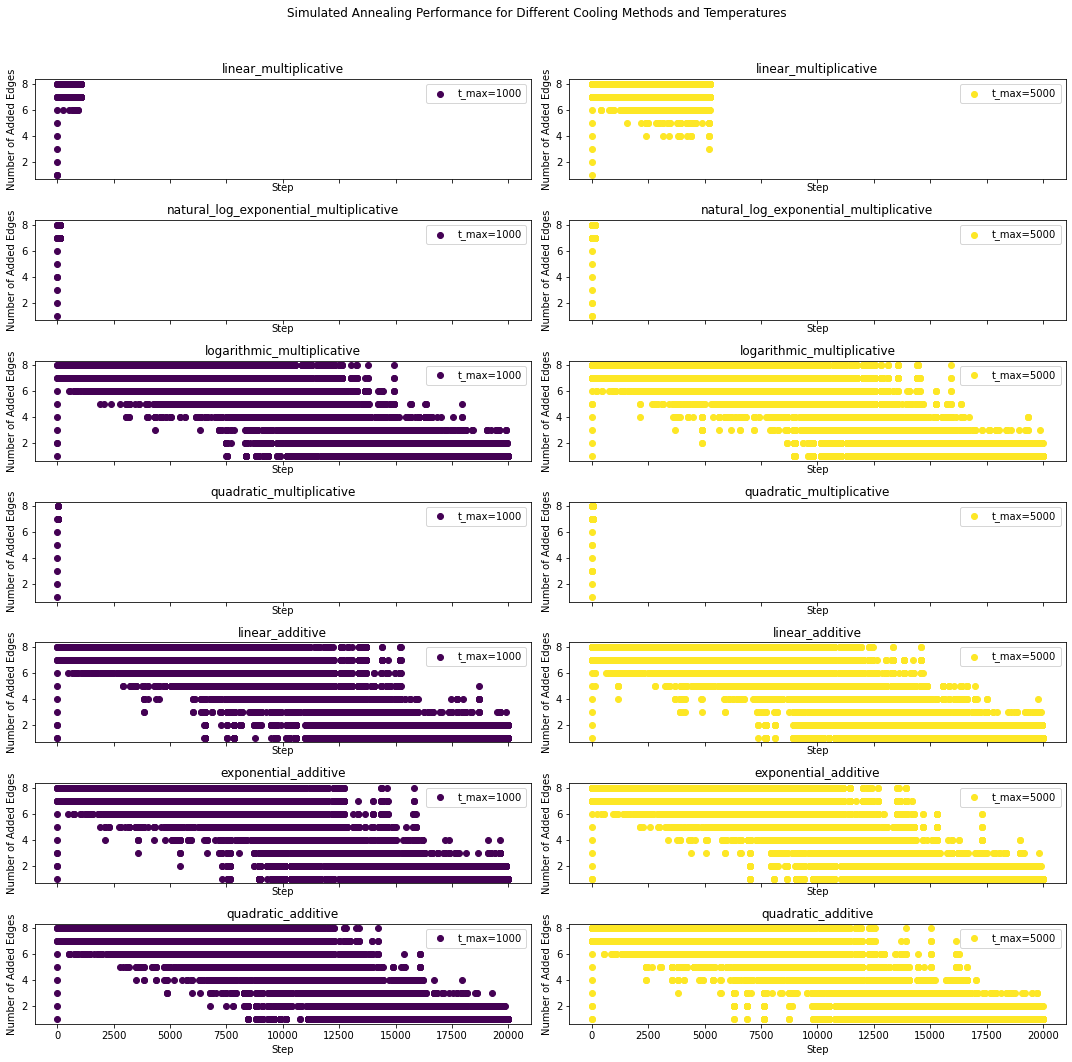

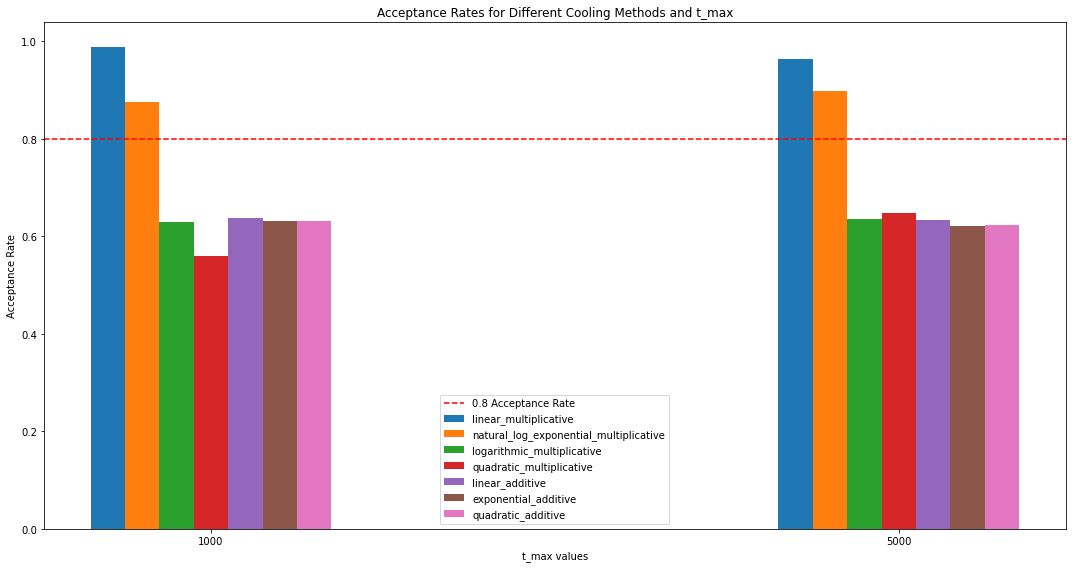

VNS


Time limit: 10
Solution: [(0, 3)], Value: 1, Number of iterations: 1105


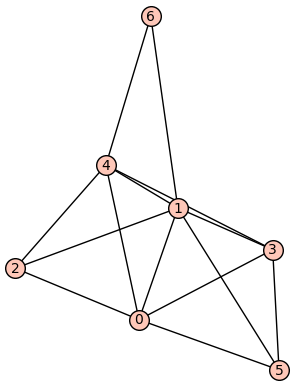

-------------------------------------------------
Time limit: 20
Solution: [(4, 5)], Value: 1, Number of iterations: 2195


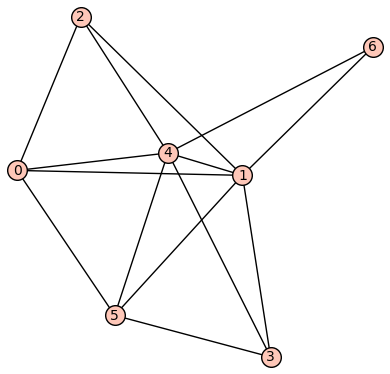

-------------------------------------------------
Time limit: 30
Solution: [(4, 5)], Value: 1, Number of iterations: 3260


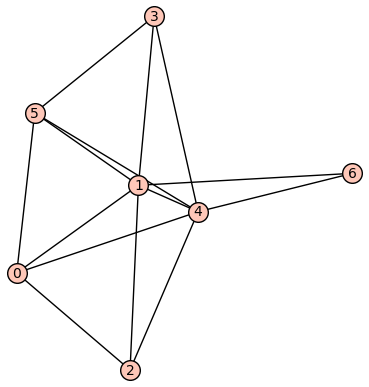

-------------------------------------------------


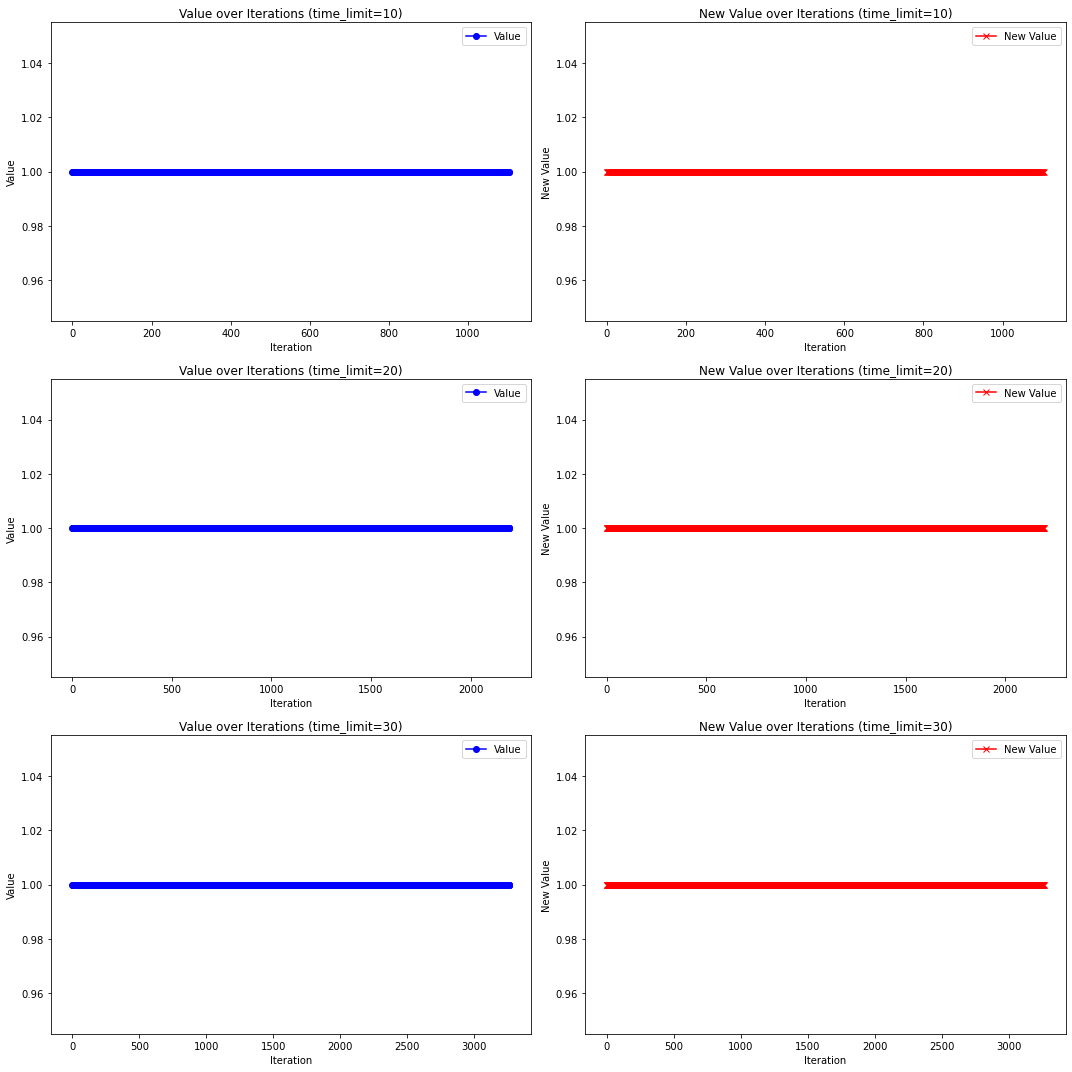

In [33]:
n = 7  # Number of vertices
p = 0.6  # Probability of edge creation

G = graphs.RandomGNP(n, p)
while not G.is_connected():
    G = graphs.RandomGNP(n, p)

G.show()

plot_sa(G)

plot_sa_cooling(G, cooling_params)

plot_vns(G, vns_params)

### Genetic algorithms - plot

In [34]:
def plot_ga(name, G):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    start_time = time.time()
    added_edges, G_min = ga.genetic_algorithm(G)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Graf: {name}")
    if added_edges is None:
        print("Initial graph is already an interval graph")
    else:
        print(f"Added edges: {added_edges}")
    print(f"Execution time: {elapsed_time:.4f} s")
    print("\n")

    # Plotting initial graph
    plot_G = G.plot(figsize=(8, 8), vertex_size=500, edge_color='blue', graph_border=False)

    # Plotting modified graph
    if added_edges is None:
        plot_G_min = G.plot(figsize=(8, 8), vertex_size=500, edge_color='blue', graph_border=False)
    else:
        plot_G_min = G_min.plot(figsize=(8, 8), vertex_size=500, edge_color='red', graph_border=False)

    # Adding graphs to subplots
    plot_G.matplotlib(figure=fig, sub=ax[0])
    ax[0].set_title(f"Initial Graph: {name}")
    ax[0].axis('off')

    plot_G_min.matplotlib(figure=fig, sub=ax[1])
    ax[1].set_title(f"Modified Graph: {name}")
    ax[1].axis('off')

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

Graf: gA
Added edges: [(1, 6), (1, 7), (1, 3), (3, 6)]
Execution time: 2.0903 s




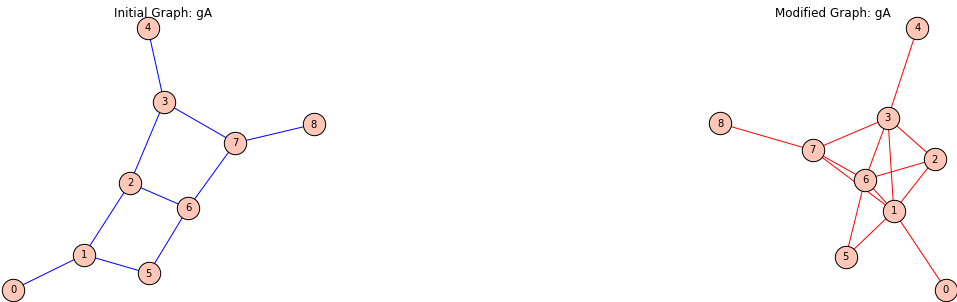

Graf: gB
Added edges: [(4, 6)]
Execution time: 1.8862 s




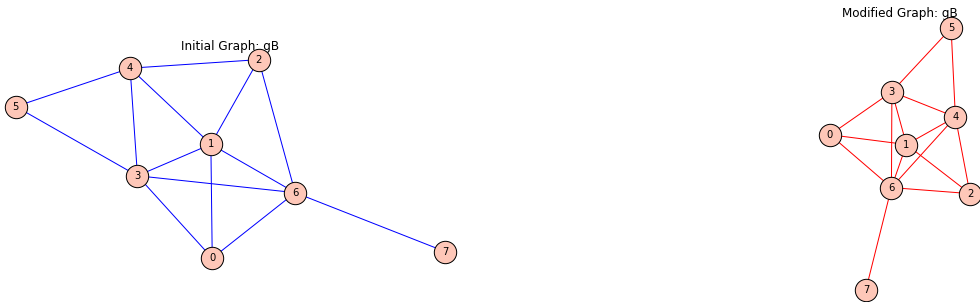

In [19]:
plot_ga('gA',Graph(gA))
plot_ga('gB',Graph(gB))

#### Testing genetic algorithm on random graph

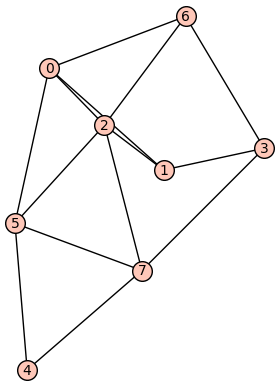

Graf: Random graph G
Added edges: [(2, 3), (0, 7), (0, 3), (3, 5)]
Execution time: 1.9766 s




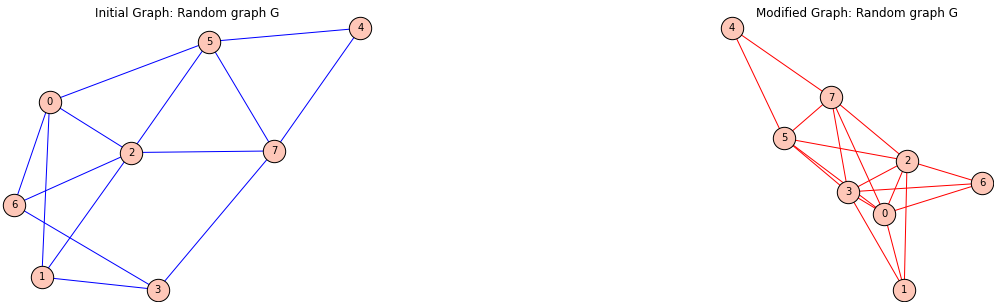

In [35]:
n = 8  # Number of vertices
p = 0.6  # Probability of edge creation

G = graphs.RandomGNP(n, p)
while not G.is_connected():
    G = graphs.RandomGNP(n, p)

G.show()

plot_ga('Random graph G', G)